<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/NB_VS_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import csv
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Crop_recommendation_fix.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,padi


In [4]:
df.label.value_counts()

padi              100
mangga            100
kapas             100
kelapa            100
pepaya            100
jeruk             100
apel              100
melon             100
semangka          100
anggur            100
pisang            100
jagung            100
delima            100
lentil            100
lentil hitam      100
kacang hijau      100
kacang panjang    100
kacang polong     100
kacang merah      100
buncis            100
kopi              100
Name: label, dtype: int64

<Axes: >

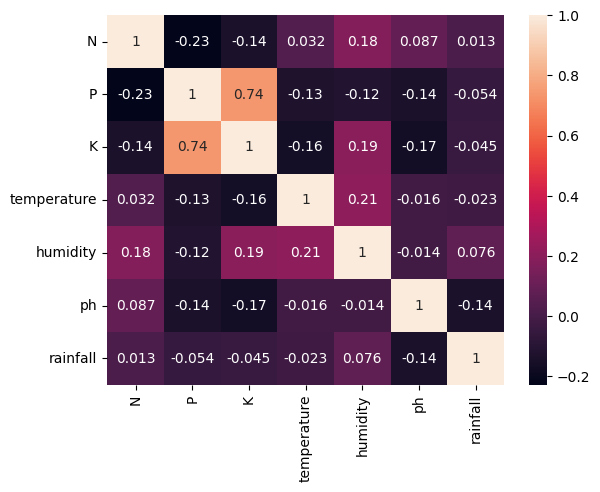

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

**separate**

In [7]:
features = df[['temperature', 'humidity']]
target = df['label']
labels = df['label']

In [8]:
acc = []
model = []

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [10]:
from sklearn.model_selection import cross_val_score

# **Guassian Naive Bayes Model**

In [11]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Akurasi Naive Bayes adalah : ", x)

print(classification_report(Ytest,predicted_values))

Akurasi Naive Bayes adalah :  0.6619047619047619
                precision    recall  f1-score   support

        anggur       0.85      0.85      0.85        13
          apel       0.67      0.86      0.75        21
        buncis       0.88      1.00      0.93        21
        delima       0.56      0.50      0.53        18
        jagung       0.62      0.56      0.59        18
         jeruk       0.87      0.48      0.62        27
  kacang hijau       0.78      0.78      0.78        23
  kacang merah       1.00      0.85      0.92        20
kacang panjang       0.44      0.38      0.41        21
 kacang polong       0.85      0.52      0.65        21
         kapas       0.47      0.41      0.44        17
        kelapa       0.68      0.68      0.68        22
          kopi       0.62      0.62      0.62        21
        lentil       0.37      0.54      0.44        13
  lentil hitam       0.69      0.91      0.78        22
        mangga       0.67      0.67      0.67        1

In [12]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.6547619 , 0.66428571, 0.64047619, 0.65      , 0.65714286])

***save*** ***trained***

In [13]:
import pickle
# trained dump NB
NB_pkl_filename = 'NBClassifier.pkl'
# Buka file dan save tipe pkl file 
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# tutup
NB_Model_pkl.close()

# **Random Forest Model**

In [14]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("Akurasi Random Forest adalah: ", x)

print(classification_report(Ytest,predicted_values))

Akurasi Random Forest adalah:  0.6571428571428571
                precision    recall  f1-score   support

        anggur       0.85      0.85      0.85        13
          apel       0.64      0.86      0.73        21
        buncis       0.87      0.95      0.91        21
        delima       0.52      0.67      0.59        18
        jagung       0.70      0.78      0.74        18
         jeruk       0.59      0.37      0.45        27
  kacang hijau       0.81      0.91      0.86        23
  kacang merah       0.94      0.85      0.89        20
kacang panjang       0.44      0.38      0.41        21
 kacang polong       0.80      0.57      0.67        21
         kapas       0.46      0.35      0.40        17
        kelapa       0.79      0.50      0.61        22
          kopi       0.57      0.57      0.57        21
        lentil       0.36      0.31      0.33        13
  lentil hitam       0.65      0.77      0.71        22
        mangga       0.61      0.78      0.68        

In [15]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.63095238, 0.63809524, 0.62619048, 0.65      , 0.63571429])

*saved* *trained*

In [16]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# **Komparasi Model**

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

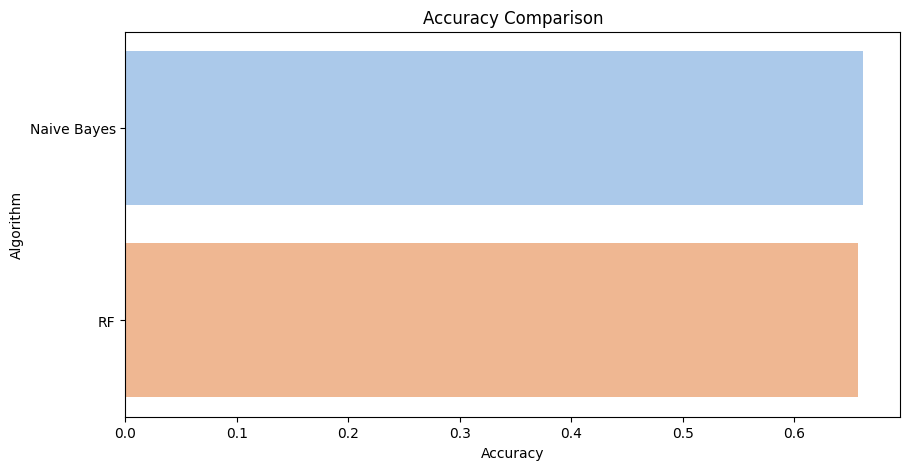

In [17]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='pastel')

In [18]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Naive Bayes --> 0.6619047619047619
RF --> 0.6571428571428571


# **Prediction**

In [19]:
data = np.array([[23.603016, 60.3]])
prediction = RF.predict(data)
print(prediction)

['kopi']
